# **Education Analysis Clustering & Classification**

# **Define Problem**

Education is the foundation of a child's development, where the quality of education and the environment given to someone can affect their path in life as an adult.

Based on the importance of education, we can see some factors that can affect the quality of education that is obtained, such as materials, learning experiences, and facilities.

To improve or better understand education, "feedback" activities are often carried out to involve ongoing feedback on the management of an institution. This is important to do because it can help identify the key factors that guarantee quality and can support strategic decision-making.

During the child's educational period, the university becomes the main education that plays a role in preparing them for the working world. In it, a student gets education about career preparation, intellectual growth, and also becomes an arena for their personal development towards maturity.

With this background, we see three goals that can improve the quality of education that is obtained, namely:
* Optimization of the delivery of education in the university environment
* The role of the community in the development of educational institutions
* University development strategy based on community feedback

In [3]:
# import libraries and packages
import pandas as pd
import numpy as np
import re # For regular ecpression fuctions

# **Data Collection**

The dataset is sourced from Kaggle (https://www.kaggle.com/datasets/omarsobhy14/university-students-complaints-and-reports). This dataset comprises reports and complaints submitted by students within a university setting. Encompassing academic issues to campus safety concerns, the dataset offers a profound insight into the student experience, potentially furnishing valuable feedback for university administration and educators. It presents a unique opportunity to comprehend students' needs and apprehensions, thereby facilitating the development of data-driven solutions to enhance the overall university experience.

In [4]:
# Load the dataset and display it's contents
df = pd.read_csv('education.csv')
df

,Genre,Reports,Age,Gpa,Year,Count,Gender,Nationality
0,Academic Support and Resources,The limited access to research databases and m...,27,2.18,2,1,M,Egypt
1,Academic Support and Resources,I'm having trouble finding the course material...,23,3.11,2,1,F,Egypt
2,Academic Support and Resources,It's frustrating to have limited access to res...,20,3.68,2,1,F,Egypt
3,Academic Support and Resources,I'm really struggling in one of my classes but...,20,1.30,2,1,F,Egypt
4,Academic Support and Resources,I am really struggling with understanding the...,26,2.50,2,1,F,Egypt
...,...,...,...,...,...,...,...,...
1000,Food and Cantines,26. I have been unable to find food that meets...,18,1.16,4,1,M,Indonesia
1001,Food and Cantines,27. I have been unable to find food that I can...,20,4.05,2,1,M,Indonesia
1002,Food and Cantines,28. I have been unable to find food that I enjoy.,22,1.86,3,1,M,Indonesia
1003,Food and Cantines,29. I have been unable to find food that is he...,20,2.06,2,1,M,Indonesia


# **Exploratory Data Analysis (EDA)**

Making insightful visuals to obtain insights and successfully share findings. using various plots, charts, and graphs to highlight various parts of the data as well as examining the distribution of sentiment labels to comprehend the general polarity of sentiment in the data.

In [5]:
print("Number of records:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of records: 1005
Number of columns: 8


In [6]:
# Check the data types of columns
df.dtypes

Genre           object
Reports         object
Age              int64
Gpa            float64
Year             int64
Count            int64
Gender          object
Nationality     object
dtype: object

In [7]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Genre        1005 non-null   object 
 1   Reports      1005 non-null   object 
 2   Age          1005 non-null   int64  
 3   Gpa          1005 non-null   float64
 4   Year         1005 non-null   int64  
 5   Count        1005 non-null   int64  
 6   Gender       1005 non-null   object 
 7   Nationality  1005 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.9+ KB


In [8]:
# Check for Not a Number values
df.isna().any()

Genre          False
Reports        False
Age            False
Gpa            False
Year           False
Count          False
Gender         False
Nationality    False
dtype: bool

In [9]:
# Calculate summary statistics
df.describe()

,Age,Gpa,Year,Count
count,1005.000000,1005.000000,1005.000000,1005.0
mean,21.298507,2.088856,2.684577,1.0
std,3.338841,1.208738,1.461665,0.0
min,16.000000,0.010000,1.000000,1.0
25%,18.000000,1.080000,1.000000,1.0
50%,21.000000,2.110000,2.000000,1.0
75%,24.000000,3.090000,4.000000,1.0
max,27.000000,4.970000,5.000000,1.0


* **Age:** 1,005 records of complaints and reports from college students are included in the dataset. With an average age of about 21, the students' ages range from 16 to 27. The interquartile range (25th to 75th percentile) shows that most students are between the ages of 18 and 24.

* **GPA:** The GPA ranges from 0.01 at the lowest end to 4.97 at the highest. The students' average GPA is about 2.09, on average. The modest level of variance in the GPA values is indicated by the standard deviation of 1.21.

* **Year:** Most likely, the "Year" column refers to the pupils' academic year or semester. Different academic levels are indicated by the values, which vary from 1 to 5. The students' average score of 2.68 indicates that they are typically in their second or third year of university education.

* **Count:** All entries have a constant value of 1, indicating that the "Count" column may not contain any useful data and can be disregarded for further investigation.

In [10]:
pip install Jinja2

In [11]:
# Group the data by `Genre`, count the `Count` column, and sort by the `Count` column in descending order
temp = df.groupby('Genre').count()['Count'].reset_index().sort_values(by='Count', ascending=False)

# Reset the DataFrame index to start from 0
temp.index = np.arange(len(temp))

# Apply a background gradient color using the `Greens` colormap
temp.style.background_gradient(cmap='Greens')

,Genre,Count
0,Academic Support and Resources,236
1,Food and Cantines,138
2,Financial Support,91
3,Online learning,90
4,Career opportunities,89
5,International student experiences,86
6,Athletics and sports,85
7,Housing and Transportation,64
8,Health and Well-being Support,53
9,Activities and Travelling,40


Here I notice that there are 11 genres of reports which we could classify the reports in to which are:

1. Academic Support and Resources
2. Food and Cantines
3. Financial Support
4. Online learning
5. Career Opportunities
6. International student experiences
7. Athletics and sports
8. Housing and Transportation
9. Health and Well-being Support
10. Activities and Travelling
11. Student Affairs

I observe that the genre contributing the most to the dataset is "Academic Support and Resources."

In [12]:
# Group the data by `Nationality`, count the `Count` column, and sort by the `Count` column in descending order
temp = df.groupby('Nationality').count()['Count'].reset_index().sort_values(by='Count', ascending=False)

# Reset the DataFrame index to start from 0
temp.index = np.arange(len(temp))

# Apply a background gradient color using the `Greens` colormap
temp.style.background_gradient(cmap='Greens')

,Nationality,Count
0,Egypt,319
1,Soudan,168
2,Indonesia,166
3,Mexico,144
4,France,133
5,Yemen,49
6,South Africa,26


Here I notice that there are 7 nationality of reports which we could classify the reports in to which are:

1. Egypt
2. Soudan
3. Indonesia
4. Mexico
5. France
6. Yemen
7. South Africa

I observe that the nationality contributing the most to the dataset is "Egypt"

In [13]:
# Top 10 Reports

# Group the data by `Reports`, count the `Count` column, and sort by the `Count` column in descending order
temp = df.groupby('Reports').count()['Count'].reset_index().sort_values(by='Count', ascending=False)

# Take the top 10 data
top_temp = temp.head(10)

# Reset the DataFrame index to start from 0
top_temp.index = np.arange(len(top_temp))

# Apply a background gradient color using the `Greens` colormap
styled_temp = top_temp.style.background_gradient(cmap='Greens')

styled_temp

,Reports,Count
0,The limited access to research databases and materials is causing a lot of frustration among students. We need better access to be able to succeed academically.,2
1,"The academic workload is causing significant stress and anxiety, and I am finding it hard to cope with the pressure.",2
2,There seems to be a scarcity of available internships and job openings in my field of study.,2
3,I'm not sure I'll be able to afford to finish my degree because of how much debt I've already accumulated.,2
4,"I find myself struggling with the difficulty of course material and trying to manage my time effectively. Balancing work and academic responsibilities is a challenge, and I'm not getting enough sleep. This is causing me stress and anxiety, which is taking a toll on my mental health.",1
5,"I have a lot of commitments outside of school, including family responsibilities, and it's been a challenge to balance everything.",1
6,"I had to take out a private loan to pay for my tuition because I didn't qualify for enough financial aid, and now I'm worried about how I'm going to pay it back.",1
7,"I had to go to the emergency room for a medical emergency, and now I'm facing a huge bill that I don't know how to pay. It's really scary and overwhelming.",1
8,I find the course material for my math class to be extremely difficult. I've been attending extra study sessions but still feel lost.,1
9,I feel like the athletic eligibility requirements are too strict and prevent many students from participating in sports.,1


The code is intended to provide an overview of the most common types of reports that students submit. This information can be used to identify areas where additional support may be needed.

In [14]:
# Get the unique ages and mode form the DataFramex

# Get the unique ages
unique_age_sorted = df['Age'].unique()
# Sort the unique ages
unique_age_sorted.sort()

# Print the unique ages
print('Unique ages:', unique_age_sorted)

# Get the mode of the ages
mode_age = df['Age'].mode().iloc[0]

# Print the mode of the ages
print('Mode age:', mode_age)

Unique ages: [16 17 18 19 20 21 22 23 24 25 26 27]
Mode age: 18


In [15]:
# Get the unique GPAs
unique_gpa_sorted = df['Gpa'].unique()

# Sort the unique GPAs
unique_gpa_sorted.sort()

# Print the unique GPAs
print('Unique GPAs:', unique_gpa_sorted)

Unique GPAs: [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.23 0.25 0.26 0.27 0.29 0.3  0.31
 0.32 0.33 0.34 0.36 0.37 0.38 0.39 0.4  0.41 0.43 0.44 0.45 0.46 0.47
 0.48 0.5  0.51 0.52 0.53 0.55 0.56 0.57 0.59 0.6  0.61 0.62 0.63 0.64
 0.65 0.66 0.67 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.79 0.8  0.81
 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.9  0.91 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26
 1.27 1.28 1.29 1.3  1.31 1.32 1.35 1.36 1.37 1.38 1.39 1.4  1.42 1.44
 1.45 1.47 1.48 1.49 1.5  1.51 1.53 1.54 1.55 1.56 1.57 1.58 1.59 1.6
 1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69 1.7  1.71 1.72 1.73 1.74
 1.75 1.76 1.77 1.78 1.79 1.8  1.82 1.83 1.86 1.87 1.88 1.89 1.9  1.91
 1.93 1.94 1.95 1.96 1.97 1.98 1.99 2.   2.01 2.03 2.04 2.05 2.06 2.07
 2.08 2.09 2.1  2.11 2.12 2.13 2.14 2.15 2.16 2.17 2.18 2.19 2.2 

In [16]:
# Display countries with GPAs above 4.0
gpa_above_4_countries = df.loc[df['Gpa'] > 4.0, 'Nationality'].unique()
print("Countries with GPAs above 4.0:", gpa_above_4_countries)

# Count the total number of GPAs above 4.0
total_gpa_above_4 = df.loc[df['Gpa'] > 4.0, 'Gpa'].count()
print("Total number of GPAs above 4.0:", total_gpa_above_4)

# Count the total number of data points from Indonesia
total_data_indonesia = df[df['Nationality'] == 'Indonesia'].shape[0]
print("Total number of data points from Indonesia:", total_data_indonesia)

# Display countries with GPAs below 4.0
gpa_below_4_countries = df.loc[df['Gpa'] < 4.0, 'Nationality'].unique()
print("Countries with GPAs below 4.0:", gpa_below_4_countries)

Countries with GPAs above 4.0: ['Indonesia']
Total number of GPAs above 4.0: 33
Total number of data points from Indonesia: 166
Countries with GPAs below 4.0: ['Egypt' 'Soudan' 'France' 'Mexico' 'South Africa' 'Yemen' 'Indonesia']


In [17]:
# Display the unique Gender
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [18]:
# Mode on GPA
print('Most common GPA:', df['Gpa'].mode().iloc[0])

# Average GPA
print('Average GPA:', df['Gpa'].mean())

Most common GPA: 2.18
Average GPA: 2.088855721393035


Used to overcome the possibility of outliers on the 'Gpa' column.

Outlier is a data point that is very different from the other data points in a dataset. Outliers can distort statistical analysis, so it is important to identify and handle outliers before performing analysis.

# **Data Cleaning**

I would clean the data set to prevent any errors.

In [19]:
# Remove spaces from column names
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Genre', 'Reports', 'Age', 'Gpa', 'Year', 'Count', 'Gender',
       'Nationality'],
      dtype='object')


In [20]:
# Remove all rows with NaN values
df.dropna(inplace=True)

# **Data Visualization**

Data visualization is the process of representing data in a graphical format, such as charts, graphs, and maps. The goal of data visualization is to make data easier to understand and interpret.

In [21]:
import plotly.express as px

I use Plotly because it can help effectively communicate the data insights through interactive and visually appealing visualizations, enhancing the overall presentation and understanding of your project's results

In [22]:
# To create a histogram that shows the distribution of genres from the data.

# Count the frequency of each genre
genre_counts = df['Genre'].value_counts()

# Create a histogram using Plotly Express with the genres sorted in order
fig = px.histogram(df, x='Genre', title='Distribution of Genre',
                   category_orders={'Genre': genre_counts.index})

# Set the title for x and y axes
fig.update_xaxes(title_text='Genre')
fig.update_yaxes(title_text='Count of Reports')

# Calculate the total frequency and add text above each bar
total_freq = df['Genre'].count()
fig.update_traces(texttemplate='%{y}', textposition='inside')

# Change the color of the histogram bars to green
fig.update_traces(marker_color='green')

# Add space between the bars
fig.update_layout(bargap=0.15)

# Show plot
fig.show()

In [23]:
# creates a funnel plot to visualize the frequency of genres in a data set.

# Count the frequency of each genre
genre_counts = df['Genre'].value_counts()

# Create data for funnel plot
funnel_data = {
    'names': genre_counts.index,
    'values': genre_counts.values
}

# Create a funnel plot using Plotly Express
fig = px.funnel_area(funnel_data, names='names', values='values',
                     title='Funnel Plot of Genre Frequencies',
                     color_discrete_sequence=['green'])

# Add the x axis dan y axis title.
fig.update_layout(xaxis_title='Genre', yaxis_title='Count of Reports')

# Show the plot
fig.show()

In [24]:
# Create a histogram of the age distribution.
fig = px.histogram(df, x="Age", title="Distribution of Age")

# Add a title and labels for the x-axis and y-axis.
fig.update_xaxes(title_text="Age")
fig.update_yaxes(title_text="Frequency")

# Calculate the total frequency and add text above each bar.
total_freq = df["Age"].count()
fig.update_traces(texttemplate="%{y}", textposition="inside")

# Change the color of the histogram bars to green.
fig.update_traces(marker_color="green")

# Add space between the bars.
fig.update_layout(bargap=0.15)

# Show the plot.
fig.show()

In [25]:
# Create a KDE plot of the GPA distribution
fig = px.histogram(df, x='Gpa', title='Kernel Density Estimation of Gpa',
                   marginal='rug', color_discrete_sequence=['green'], nbins=20,
                   histnorm='probability density')

fig.update_xaxes(title_text='Gpa')
fig.update_yaxes(title_text='Density')

# Add space between the bars
fig.update_layout(bargap=0.15)

# Show the plot
fig.show()


In [26]:
# Create a histogram of year distribution.
fig = px.histogram(df, x='Year', title='Distribution of Year')
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Frequency')

# Calculate the total frequency and add text above each bar
total_freq = df['Year'].count()
fig.update_traces(texttemplate='%{y}', textposition='inside')

# Change the color of the histogram bars to green
fig.update_traces(marker_color='green')

# Add space between the bars
fig.update_layout(bargap=0.15)

# Show the plot
fig.show()

In [27]:
# Count the frequency of each gender
gender_counts = df['Gender'].value_counts()

# Set the order of the x-axis
x_order = ['M', 'F']

# Create a bar chart of the distribution of gender
fig = px.bar(x=gender_counts.index, y=gender_counts.values,
             color=gender_counts.index, text_auto=True,
             color_discrete_map={'M': 'blue', 'F': 'red'},
             title='Distribution of Gender',
             category_orders={'x': x_order})

# Show the plot
fig.show()

In [28]:
# Plot the relationship between age and GPA
fig = px.scatter(df, x="Gpa", y="Age", color="Gender",
                 size='Year', hover_name = 'Genre')

# Show the plot
fig.show()


In [29]:
# Create a box plot to compare the distribution of GPA by Genre.
# The goal is to see the distribution of GPA in different genres, identify differences in the mean, and see the existence of outliers in the genre.

# Create a box plot using Plotly Express
fig = px.box(df, x='Genre', y='Gpa', title='GPA Distribution by Genre', color_discrete_sequence=['green'])

# Add x-axis and y-axis labels
fig.update_xaxes(title_text='Genre')
fig.update_yaxes(title_text='GPA')

# Show the plot
fig.show()

In [30]:
# Stacked Bar chart for visualizes the number of complaints by genre and gender.
fig = px.histogram(df, x='Genre', color='Gender', barmode='group',
                   title='Number of Complaints by Genre and Gender', text_auto=True)

# Show the plot
fig.show()

In [31]:
# Stacked Histogram that visualizes the number of complaints by genre and year
fig = px.histogram(df, x='Genre', color='Year', title='Genre vs Count', text_auto=True)

# show the plot
fig.show()

# **Data Pre-processing**

Preprocessing the data by handling contractions, converting text to lower case removing stop words, punctuations, hashtags, numbers/digits and special characters and then tokenizing and lemmatizing the text.

In [32]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [33]:
# Function to handle contractions
def handle_contractions(text):
    contractions = {
        "dont": "do not",
        "doesnt": "does not",
        "'s": " is",
        "'re": " are",
        "ive": "i have",
        "'d": " would",
        "'ll": " will",
        "im": "i am"
    }

    words = text.split()
    for i in range(len(words)):
        if words[i] in contractions:
            words[i] = contractions[words[i]]
    return ' '.join(words)

In [34]:
# Function to remove URLs, hashtags, mentions, and special characters
def remove_special_characters(text):
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    return text

# Function to remove numbers/digits
def remove_numbers(text):
    text = re.sub(r'\b[0-9]+\b\s*', '', text)
    return text

# Function to remove punctuation
def remove_punctuation(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

# Function to tokenize the text
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Function to remove stop words
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Function to convert tokens to lowercase
def convert_to_lowercase(tokens):
    tokens = [token.lower() for token in tokens]
    return tokens

# Function to lemmatize the words
def lemmatize_words(tokens):
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Main preprocessing function
def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = remove_special_characters(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    tokens = tokenize_text(text)
    text = handle_contractions(' '.join(tokens))
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    tokens = convert_to_lowercase(tokens)
    tokens = lemmatize_words(tokens)
    processed_text = ' '.join(tokens)
    return processed_text


In [35]:
# Apply preprocessing to the 'Reports' column
df['Processed_Reports'] = df['Reports'].apply(preprocess_text)

# Reorder the columns
df = df[['Genre', 'Reports', 'Processed_Reports', 'Age', 'Gpa', 'Year', 'Count', 'Gender', 'Nationality']]

In [36]:
# Display the df with the new format and columns
df.head()

,Genre,Reports,Processed_Reports,Age,Gpa,Year,Count,Gender,Nationality
0,Academic Support and Resources,The limited access to research databases and m...,limited access research database material caus...,27,2.18,2,1,M,Egypt
1,Academic Support and Resources,I'm having trouble finding the course material...,trouble finding course material need class lib...,23,3.11,2,1,F,Egypt
2,Academic Support and Resources,It's frustrating to have limited access to res...,frustrating limited access research database m...,20,3.68,2,1,F,Egypt
3,Academic Support and Resources,I'm really struggling in one of my classes but...,really struggling one class cant get appointme...,20,1.30,2,1,F,Egypt
4,Academic Support and Resources,I am really struggling with understanding the...,really struggling understanding instruction as...,26,2.50,2,1,F,Egypt


# **Feature Engineering**

 Feature engineering is the process of transforming raw data into features that are more relevant and useful for machine learning models.

In [37]:
# Change the GPA values above 4.0 to the mode GPA value, which is 2.18
df.loc[df['Gpa'] > 4.0, 'Gpa'] = 2.18

In [38]:
# Function to count the number of words in text
def word_count(text):
    words = text.split()
    return len(words)

# Function to calculate the average word length in text
def average_word_length(text):
    words = text.split()
    total_length = sum(len(word) for word in words)
    return total_length / len(words) if len(words) > 0 else 0

# Function to calculate the average sentence length in text
def average_sentence_length(text):
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    total_length = sum(len(sentence) for sentence in sentences)
    return total_length / len(sentences) if len(sentences) > 0 else 0

In [39]:
# Convert a numerical GPA into a letter grade representation based on common grading conventions.
def categorize_gpa(gpa):
    if 3.3 <= gpa <= 4.0:
        return 'A'
    elif 2.3 <= gpa < 3.3:
        return 'B'
    elif 1.3 <= gpa < 2.3:
        return 'C'
    elif 0.7 <= gpa < 1.3:
        return 'D'
    else:
        return 'F'

# Use the apply function to create a new column named 'Gpa_Label'
df['Gpa_Label'] = df.loc[:, 'Gpa'].apply(categorize_gpa)

# Drop the 'Gpa' column
df.drop(columns=['Gpa'], inplace=True)

<ipython-input-39-637a2cf16ca2>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
# Add new columns for char_count, word_count, sentence_count, average_word_length, and average_sentence_length
df['Char_Count'] = df['Processed_Reports'].apply(len)
df['Word_Count'] = df['Processed_Reports'].apply(word_count)
df['Average_Word_Length'] = df['Processed_Reports'].apply(average_word_length)
df['Average_Sentence_Length'] = df['Processed_Reports'].apply(average_sentence_length)

# Display the top 10 word counts in 'Processed Reports'
df.sort_values(by='Char_Count', ascending=False).head(10)

,Genre,Reports,Processed_Reports,Age,Year,Count,Gender,Nationality,Gpa_Label,Char_Count,Word_Count,Average_Word_Length,Average_Sentence_Length
175,Academic Support and Resources,The academic workload is taking its toll on me...,academic workload taking toll especially since...,16,1,1,M,Soudan,F,258,32,7.093750,258.0
179,Academic Support and Resources,The academic workload is getting to be too muc...,academic workload getting much finding course ...,23,1,1,F,Soudan,D,252,32,6.906250,252.0
177,Academic Support and Resources,It's challenging to keep up with the academic ...,challenging keep academic workload especially ...,26,1,1,F,Soudan,F,247,32,6.750000,247.0
173,Academic Support and Resources,Managing the academic workload and the difficu...,managing academic workload difficulty course m...,18,1,1,F,Soudan,D,239,30,7.000000,239.0
178,Academic Support and Resources,The academic workload is becoming overwhelming...,academic workload becoming overwhelming course...,26,1,1,M,Soudan,F,238,28,7.535714,238.0
174,Academic Support and Resources,I'm finding it hard to keep up with the academ...,finding hard keep academic workload especially...,18,1,1,F,Soudan,D,235,29,7.137931,235.0
176,Academic Support and Resources,I'm struggling with the academic workload and ...,struggling academic workload difficulty course...,27,1,1,F,Soudan,D,227,28,7.142857,227.0
171,Academic Support and Resources,The academic workload is becoming overwhelming...,academic workload becoming overwhelming especi...,21,1,1,F,Soudan,D,221,28,6.928571,221.0
180,Academic Support and Resources,"Managing the academic workload is a challenge,...",managing academic workload challenge especiall...,22,1,1,F,Soudan,A,221,28,6.928571,221.0
836,Activities and Travelling,"10. ""I'm passionate about sustainability and t...",passionate sustainability environment would lo...,25,4,1,F,Yemen,C,215,26,7.307692,215.0


In [41]:
# Selecting specific columns 'Reports' and 'Processed_Reports' from the DataFrame
selected_columns = ['Reports', 'Processed_Reports']

# Shows the selected columns
df[selected_columns]

,Reports,Processed_Reports
0,The limited access to research databases and m...,limited access research database material caus...
1,I'm having trouble finding the course material...,trouble finding course material need class lib...
2,It's frustrating to have limited access to res...,frustrating limited access research database m...
3,I'm really struggling in one of my classes but...,really struggling one class cant get appointme...
4,I am really struggling with understanding the...,really struggling understanding instruction as...
...,...,...
1000,26. I have been unable to find food that meets...,unable find food meet dietary need
1001,27. I have been unable to find food that I can...,unable find food afford
1002,28. I have been unable to find food that I enjoy.,unable find food enjoy
1003,29. I have been unable to find food that is he...,unable find food healthy nutritious


## Sentiment scores and Labels

Calaculating the sentiment scores and it's corresponding labels.

In the context of sentiment analysis, subjectivity scores can help to distinguish between subjective statements that reflect personal opinions or emotions and objective statements that convey factual information. A high subjectivity score indicates a higher degree of personal bias or opinion, while a low subjectivity score indicates a more objective or factual nature of the text.

Subjectivity is an important aspect to consider along with polarity (sentiment) analysis, as it provides additional context and nuance in understanding the nature of the text and the subjective or objective nature of the statements being analyzed. The interpretation of subjectivity scores depends on the specific context and purpose of the analysis. In general, a high subjectivity score indicates a higher degree of personal opinion or bias expressed in the text. This can be useful if you are interested in capturing and analyzing subjective or emotional content, such as in sentiment analysis.

However, if the goal is to analyze and classify factual or objective information, a low subjectivity score will be preferable. A low subjectivity score indicates that the text contains more objective statements that are based on facts or present information without personal opinion or bias.

In [42]:
# Importing the TextBlob class from the textblob library

from textblob import TextBlob

TextBlob is a versatile and user-friendly library that strikes a balance between simplicity and functionality, making it a great choice for a wide range of text analysis tasks.

In [43]:
# Function to calculate sentiment and sentiment label
def calculate_sentiment(row):
    # Calculate sentiment using TextBlob and get polarity and subjectivity
    sentiment = TextBlob(row['Processed_Reports']).sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity

    # Determine sentiment label based on polarity and subjectivity
    if polarity > 0 and subjectivity > 0.5:
        return 'Positive'
    elif polarity < 0 and subjectivity > 0.5:
        return 'Negative'
    else:
        return 'Neutral'

In [44]:
# Calculate sentiment and sentiment label
df['Sentiment_Score'] = df.apply(lambda row: TextBlob(row['Processed_Reports']).sentiment.polarity, axis=1)
df['Subjectivity_Score'] = df.apply(lambda row: TextBlob(row['Processed_Reports']).sentiment.subjectivity, axis=1)
df['Sentiment_Label'] = df.apply(calculate_sentiment, axis=1)

# Display the first few rows of the DataFrame with the new columns
df

,Genre,Reports,Processed_Reports,Age,Year,Count,Gender,Nationality,Gpa_Label,Char_Count,Word_Count,Average_Word_Length,Average_Sentence_Length,Sentiment_Score,Subjectivity_Score,Sentiment_Label
0,Academic Support and Resources,The limited access to research databases and m...,limited access research database material caus...,27,2,1,M,Egypt,C,124,16,6.812500,124.0,0.309524,0.422619,Neutral
1,Academic Support and Resources,I'm having trouble finding the course material...,trouble finding course material need class lib...,23,2,1,F,Egypt,B,72,10,6.300000,72.0,-0.200000,0.200000,Neutral
2,Academic Support and Resources,It's frustrating to have limited access to res...,frustrating limited access research database m...,20,2,1,F,Egypt,A,127,16,7.000000,127.0,-0.235714,0.521429,Negative
3,Academic Support and Resources,I'm really struggling in one of my classes but...,really struggling one class cant get appointme...,20,2,1,F,Egypt,C,104,16,5.562500,104.0,0.166667,0.066667,Neutral
4,Academic Support and Resources,I am really struggling with understanding the...,really struggling understanding instruction as...,26,2,1,F,Egypt,B,74,8,8.375000,74.0,0.066667,0.327778,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Food and Cantines,26. I have been unable to find food that meets...,unable find food meet dietary need,18,4,1,M,Indonesia,D,34,6,4.833333,34.0,-0.500000,0.500000,Neutral
1001,Food and Cantines,27. I have been unable to find food that I can...,unable find food afford,20,2,1,M,Indonesia,C,23,4,5.000000,23.0,-0.500000,0.500000,Neutral
1002,Food and Cantines,28. I have been unable to find food that I enjoy.,unable find food enjoy,22,3,1,M,Indonesia,C,22,4,4.750000,22.0,-0.050000,0.500000,Neutral
1003,Food and Cantines,29. I have been unable to find food that is he...,unable find food healthy nutritious,20,2,1,M,Indonesia,C,35,5,6.200000,35.0,0.000000,0.500000,Neutral


## Aspect-Based sentiment Analysis Metrics

Summary statistics and metrics

In [45]:
# Calculate Sentiment Analysis Metrics
sentiment_counts = df['Sentiment_Label'].value_counts()
average_sentiment_score = df['Sentiment_Score'].mean()
average_subj_score = df['Subjectivity_Score'].mean()
average_feedback_length = df['Char_Count'].mean()

# Calculate Categorical Metrics
genre_counts = df['Genre'].value_counts()
sentiment_distribution = df.groupby('Genre')['Sentiment_Label'].value_counts(normalize=True)

# Print Sentiment Analysis Metrics
print("Sentiment Analysis Metrics:")
print("Sentiment Counts:\n", sentiment_counts)
print("Average Sentiment Score:", average_sentiment_score)
print("Average Subjectivity Score:", average_subj_score)
print('Average Feedback Length:', average_feedback_length)

# Print Categorical Metrics
print("\nCategorical Metrics:")
print("Genre Value Counts:\n", genre_counts)

# Print Sentiment Distribution by Genre
print("\nSentiment Distribution by Genre:")
print(sentiment_distribution)

Sentiment Analysis Metrics:
Sentiment Counts:
 Neutral     651
Negative    184
Positive    170
Name: Sentiment_Label, dtype: int64
Average Sentiment Score: 0.012439092955137732
Average Subjectivity Score: 0.4205786868511993
Average Feedback Length: 86.32139303482587

Categorical Metrics:
Genre Value Counts:
 Academic Support and Resources       236
Food and Cantines                    138
Financial Support                     91
Online learning                       90
Career opportunities                  89
International student experiences     86
Athletics and sports                  85
Housing and Transportation            64
Health and Well-being Support         53
Activities and Travelling             40
Student Affairs                       33
Name: Genre, dtype: int64

Sentiment Distribution by Genre:
Genre                              Sentiment_Label
Academic Support and Resources     Neutral            0.661017
                                   Negative           0.190678
  

# Analyzing the frequency of specific keywords or phrases in the feedback

In [46]:
# analyze the frequency of specific keywords or phrases in the feedback
from collections import Counter

# The keywords or phrases of interest
keywords = ['frustrating', 'difficult', 'terrible', 'great', 'best', 'worst', 'good', 'struggling', 'unable', 'helpful']

# Concatenate all the preprocessed feedback into a single string
all_feedback = ' '.join(df['Processed_Reports'])

# Tokenize the text into individual words
tokens = all_feedback.split()

# Count the frequency of each keyword in the feedback
keyword_frequency = Counter(tokens)

# Print the frequency of each keyword
for keyword in keywords:
    print(f"Frequency of '{keyword}': {keyword_frequency[keyword]}")

Frequency of 'frustrating': 77
Frequency of 'difficult': 107
Frequency of 'terrible': 4
Frequency of 'great': 36
Frequency of 'best': 4
Frequency of 'worst': 0
Frequency of 'good': 6
Frequency of 'struggling': 58
Frequency of 'unable': 5
Frequency of 'helpful': 9


# Text clustering to group similar report together

Using Kmeans

In [47]:
# Import necessary modules for text analysis and clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [48]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization to the processed feedback text
tfidf_matrix = vectorizer.fit_transform(df['Processed_Reports'])

# Since the number of clusters is predetermined, elbow or silhouette analysis is not necessary.
# Perform K-means clustering
num_clusters = 3  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)

# Fit the TF-IDF matrix to the K-means model
kmeans.fit(tfidf_matrix)

# Assign cluster labels to the report data
df['Cluster'] = kmeans.labels_

# Apply dimensionality reduction using PCA
pca = PCA(n_components=2) # Initialize PCA for dimensionality reduction
reduced_features = pca.fit_transform(tfidf_matrix.toarray()) # # Transform the TF-IDF matrix to a 2-dimensional array using PCA

# Plot the clusters using Plotly Express
fig = px.scatter(x=reduced_features[:, 0], y=reduced_features[:, 1], color=df['Cluster'],
                 title='K-means Clustering Visualization', labels={'x': 'PC1', 'y': 'PC2'},
                 color_continuous_scale='viridis')

fig.show()

# Print the top terms for each cluster
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:
        print(f"  {terms[ind]}")
    print()

Top terms per cluster:
Cluster 0:
  student
  university
  opportunity
  job
  feel
  like
  wish
  make
  need
  frustrating

Cluster 1:
  option
  food
  campus
  offer
  available
  cafeteria
  cantine
  affordable
  care
  health

Cluster 2:
  academic
  access
  limited
  course
  material
  class
  difficult
  online
  time
  causing



## **Emotion Detection**

**Emotion Recognition in Reports.**
When retrieving sentiment scores, which include polarity (a value between -1 and 1 indicating sentiment) and subjectivity (a value between 0 and 1 showing text subjectivity), one uses the sentiment attributes of the TextBlob object.

**Emotional Polarity** This metric gauges a text's emotions or emotional undertone. It shows if the text evokes a pleasant, unpleasant, or neutral reaction. Using SentimentIntensityAnalyzer from NLTK, the polarity score is obtained in the provided code. Positive, negative, and neutral attitudes are all represented by values in the polarity score. The overall sentiment or emotional tone of the feedback language can be determined using sentiment polarity.

**Emotional Subjectivity** The feeling or emotional tone of a text is measured by emotional polarity. It reveals if a good, negative, or neutral feeling is being expressed by the text. SentimentIntensityAnalyzer from NLTK is used in the provided code to determine the polarity score. Positive, negative, and neutral sentiment values are all included in the polarity score. Sentiment polarity can be used to determine the feedback text's overall sentiment or emotional tone.

In [49]:
# Function to calculate emotion scores (polarity and subjectivity) for a given text
def calculate_emotions(text):
    blob = TextBlob(text)
    emotion_scores = blob.sentiment.polarity, blob.sentiment.subjectivity
    return emotion_scores

# Apply emotion analysis to the feedback text
df['Emotion_Scores'] = df['Processed_Reports'].apply(calculate_emotions)

# Extract emotion scores for each emotion category
df['Emotion_Polarity'] = df['Emotion_Scores'].apply(lambda x: x[0])

# Assign emotion labels based on polarity values
df['Emotion_Label'] = df['Emotion_Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Display the resulting DataFrame with emotion scores and labels
df[['Processed_Reports', 'Emotion_Polarity', 'Emotion_Label']].head()

,Processed_Reports,Emotion_Polarity,Emotion_Label
0,limited access research database material caus...,0.309524,Positive
1,trouble finding course material need class lib...,-0.200000,Negative
2,frustrating limited access research database m...,-0.235714,Negative
3,really struggling one class cant get appointme...,0.166667,Positive
4,really struggling understanding instruction as...,0.066667,Positive


# **Second EDA**

In [50]:
# Import necessary modules for creating visualizations and word clouds
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [51]:
# Display the first few rows of the DataFrame
df.head()

,Genre,Reports,Processed_Reports,Age,Year,Count,Gender,Nationality,Gpa_Label,Char_Count,Word_Count,Average_Word_Length,Average_Sentence_Length,Sentiment_Score,Subjectivity_Score,Sentiment_Label,Cluster,Emotion_Scores,Emotion_Polarity,Emotion_Label
0,Academic Support and Resources,The limited access to research databases and m...,limited access research database material caus...,27,2,1,M,Egypt,C,124,16,6.8125,124.0,0.309524,0.422619,Neutral,2,"(0.30952380952380953, 0.4226190476190476)",0.309524,Positive
1,Academic Support and Resources,I'm having trouble finding the course material...,trouble finding course material need class lib...,23,2,1,F,Egypt,B,72,10,6.3000,72.0,-0.200000,0.200000,Neutral,2,"(-0.2, 0.2)",-0.200000,Negative
2,Academic Support and Resources,It's frustrating to have limited access to res...,frustrating limited access research database m...,20,2,1,F,Egypt,A,127,16,7.0000,127.0,-0.235714,0.521429,Negative,2,"(-0.2357142857142857, 0.5214285714285715)",-0.235714,Negative
3,Academic Support and Resources,I'm really struggling in one of my classes but...,really struggling one class cant get appointme...,20,2,1,F,Egypt,C,104,16,5.5625,104.0,0.166667,0.066667,Neutral,2,"(0.16666666666666666, 0.06666666666666667)",0.166667,Positive
4,Academic Support and Resources,I am really struggling with understanding the...,really struggling understanding instruction as...,26,2,1,F,Egypt,B,74,8,8.3750,74.0,0.066667,0.327778,Neutral,0,"(0.06666666666666668, 0.3277777777777778)",0.066667,Positive


In [52]:
# Correlation between "Age" and "Gpa_Label": Calculate the correlation between students' age and their GPA label category
# to examine if there is any relationship between age and academic performance.
# Convert Gpa_Label to numeric values

# Mapping GPA label categories to numeric values
gpa_label_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
df['Gpa_Label_Num'] = df['Gpa_Label'].map(gpa_label_mapping)

# Calculate the correlation matrix between "Age" and "Gpa_Label_Num"
correlation_matrix = df[['Age', 'Gpa_Label_Num']].corr()

# Create an annotated heatmap to visualize the correlation
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    colorscale='Greens',
    showscale=True,
    colorbar=dict(tickvals=[-1, -0.5, 0, 0.5, 1], ticktext=['Strong Negative', 'Negative', 'Neutral', 'Positive', 'Strong Positive']),
)

# Customize the layout of the visualization
fig.update_layout(
    title='Correlation between Age and GPA'
)

# Display the heatmap
fig.show()

In [53]:
# Correlation between "Year" and "Gpa_Label": Explore potential correlation between students' academic year and their GPA label category.

# Calculate the correlation matrix between "Year" and "Gpa_Label_Num"
correlation_matrix = df[['Year', 'Gpa_Label_Num']].corr()

# Create an annotated heatmap to visualize the correlation
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    colorscale='Greens',
    showscale=True,
    colorbar=dict(tickvals=[-1, -0.5, 0, 0.5, 1], ticktext=['Strong Negative', 'Negative', 'Neutral', 'Positive', 'Strong Positive']),
)

# Customize the layout of the visualization
fig.update_layout(
    title='Correlation between Year and GPA'
)

# Display the heatmap
fig.show()

In [54]:
# Print the data types of columns in the DataFrame
print(df.dtypes)

Genre                       object
Reports                     object
Processed_Reports           object
Age                          int64
Year                         int64
Count                        int64
Gender                      object
Nationality                 object
Gpa_Label                   object
Char_Count                   int64
Word_Count                   int64
Average_Word_Length        float64
Average_Sentence_Length    float64
Sentiment_Score            float64
Subjectivity_Score         float64
Sentiment_Label             object
Cluster                      int32
Emotion_Scores              object
Emotion_Polarity           float64
Emotion_Label               object
Gpa_Label_Num                int64
dtype: object


In [55]:
# Drop the 'Count' column from the DataFrame to remove this feature from the dataset.
df = df.drop(['Count'], axis=1)

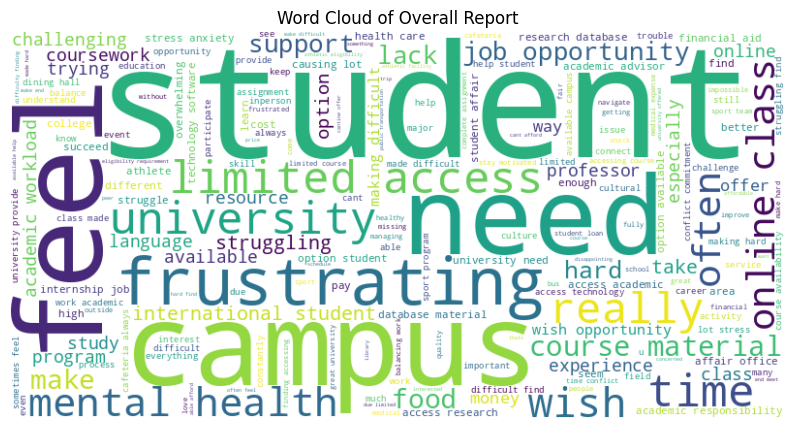

In [56]:
# Word cloud for Overall Feedback: Combine all feedback into a single string
# Concatenate all processed reports into a single string
all_reports = ' '.join(df['Processed_Reports'])

# Create a plot for the word cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reports)

# Display the word cloud image with appropriate settings
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Overall Report')
plt.show()

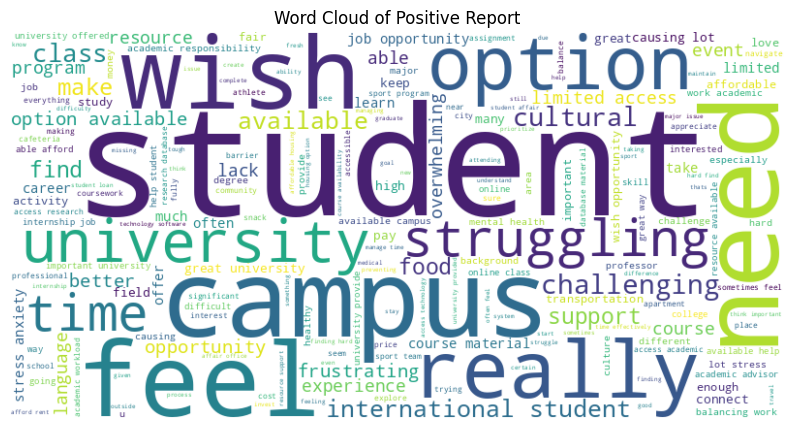

In [57]:
# Word cloud for Positive Report
# Concatenate all processed reports with positive sentiment into a single string
positive_reports = ' '.join(df[df['Emotion_Label'] == 'Positive']['Processed_Reports'])

# Create a plot for the word cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reports)

# Display the word cloud image with appropriate settings
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Report')
plt.show()

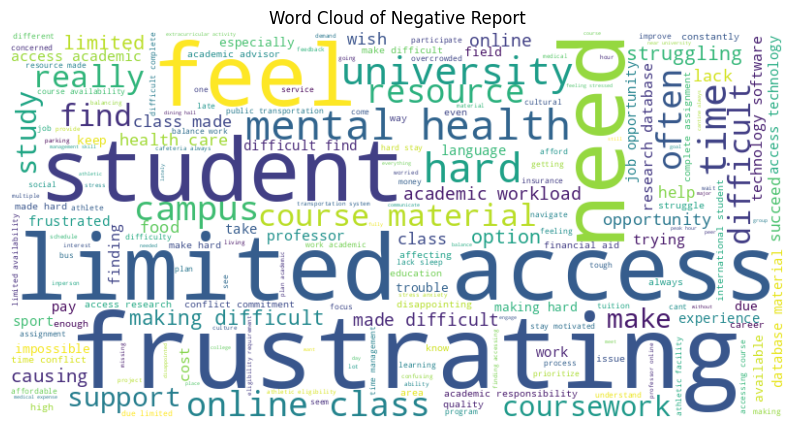

In [58]:
# Word cloud for Negative Report
# Concatenate all processed reports with negative sentiment into a single string
negative_reports = ' '.join(df[df['Emotion_Label'] == 'Negative']['Processed_Reports'])

# Create a plot for the word cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reports)

# Display the word cloud image with appropriate settings
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Report')
plt.show()

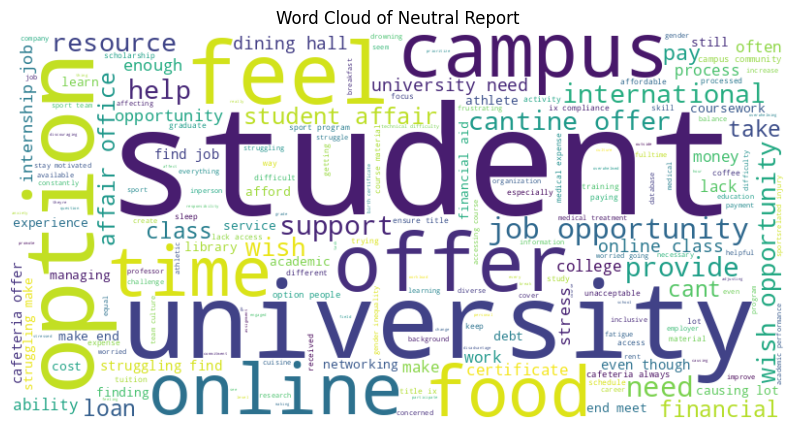

In [59]:
# Word cloud for Neutral Report
# Concatenate all processed reports with neutral sentiment into a single string
neutral_reports = ' '.join(df[df['Emotion_Label'] == 'Neutral']['Processed_Reports'])

# Create a plot for the word cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_reports)

# Display the word cloud image with appropriate settings
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Neutral Report')
plt.show()

In [60]:
# Calculate the frequency of each sentiment label
sentiment_counts = df['Sentiment_Label'].value_counts()

# Create a bar chart using Plotly Express
fig = px.bar(x=sentiment_counts.index, y=sentiment_counts.values,
             color=sentiment_counts.index, text_auto=True,
             title='Distribution of Sentiment - Bar Plot')

# Display the bar chart
fig.show()

In [61]:
# Calculate the frequency of each sentiment label
sentiment_counts = df['Sentiment_Label'].value_counts()

# Create a pie chart using Plotly Express
fig = px.pie(
    names=sentiment_counts.index,
    values=sentiment_counts.values,
    title='Distribution of Sentiment',
    hole=0.4,
    category_orders={'x': sentiment_counts.index},
)

# Display the pie chart
fig.show()

In [62]:
# Count the frequency of each word in the processed reports
word_frequency = Counter(" ".join(df['Processed_Reports']).split()).most_common(30)

# Create a horizontal bar chart using Plotly Express
fig = px.bar(
    x=[word[1] for word in word_frequency],  # Set frequency values as the x-axis
    y=[word[0] for word in word_frequency],  # Set word labels as the y-axis
    orientation='h',  # Set orientation to horizontal
    title='Top 30 Most Frequent Words',  # Set the title of the bar chart
    labels={'x': 'Frequency', 'y': 'Word'},  # Set axis labels
    height=800,  # Set the height of the visualization
    width=1000  # Set the width of the visualization
)

# Display the bar chart
fig.show()

In [63]:
# Create a box plot using Plotly Express to visualize sentiment distribution by genre
fig = px.box(df, x='Genre', y='Sentiment_Score', title='Sentiment Distribution by Genre',
             labels={'Genre': 'Genre', 'Sentiment_Score': 'Sentiment Score'})

# Customize the layout of the box plot
fig.update_layout(
    xaxis={'categoryorder': 'total descending'},  # Sort the x-axis categories in descending order of total
    xaxis_title='Genre',  # Set the x-axis label
    yaxis_title='Sentiment Score',  # Set the y-axis label
    xaxis_tickangle=-45,  # Rotate the x-axis labels for better visibility
)

# Display the box plot
fig.show()

In [64]:
# Print the data types of columns in the DataFrame

print(df.dtypes)

Genre                       object
Reports                     object
Processed_Reports           object
Age                          int64
Year                         int64
Gender                      object
Nationality                 object
Gpa_Label                   object
Char_Count                   int64
Word_Count                   int64
Average_Word_Length        float64
Average_Sentence_Length    float64
Sentiment_Score            float64
Subjectivity_Score         float64
Sentiment_Label             object
Cluster                      int32
Emotion_Scores              object
Emotion_Polarity           float64
Emotion_Label               object
Gpa_Label_Num                int64
dtype: object


In [65]:
# Distribution of length of processed report
# Calculate the frequency of each character count in the processed reports
length_report = df['Char_Count'].value_counts()

# Create a bar chart using Plotly Express
fig = px.bar(x=length_report.index, y=length_report.values,
             color=length_report.index, text_auto=True,
             title='Distribution of Length of Processed Report',
             category_orders={'x': x_order})  # Note: 'x_order' needs to be defined

# Customize the layout of the bar chart
fig.update_layout(
    xaxis_title='Length',  # Set the x-axis label
    yaxis_title='Count',  # Set the y-axis label
)

# Display the bar chart
fig.show()

<ipython-input-66-2edf87976fb2>:5: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



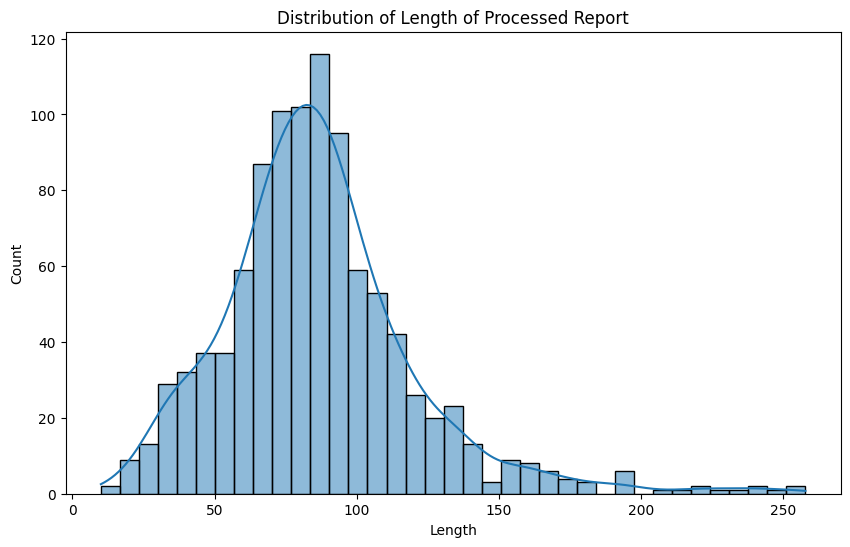

In [66]:
# Distribution of length of processed feedback
plt.figure(figsize=(10, 6))

# Create a histogram plot using seaborn
sns.histplot(df['Char_Count'], kde=True, palette='hls')

# Set the title, x-axis label, and y-axis label
plt.title('Distribution of Length of Processed Report')
plt.xlabel('Length')
plt.ylabel('Count')

# Display the histogram plot
plt.show()

In [67]:
# Bar plot for Sentiment distribution by Genre
# Create a bar plot using Plotly Express to visualize sentiment distribution by genre
fig = px.histogram(df, x='Genre', color='Sentiment_Label', barmode='group',
             title='Sentiment Distribution by Genre',
             labels={'Genre': 'Genre', 'count': 'Count of Report', 'Sentiment_Label': 'Sentiment'},
             text_auto=True,
             category_orders={'Sentiment_Label': ['Neutral', 'Negative', 'Positive']})

# Customize the layout of the bar plot
fig.update_layout(
    xaxis={'tickangle': 25},  # Rotate the x-axis labels for better visibility
    xaxis_title='Genre',  # Set the x-axis label
    yaxis_title='Count of Report',  # Set the y-axis label
    legend_title='Sentiment',  # Set the legend title
)

# Display the bar plot
fig.show()

In [68]:
# Bar plot for Sentiment distribution by Gender
# Create a bar plot using Plotly Express to visualize sentiment distribution by gender
fig = px.histogram(df, x='Gender', color='Sentiment_Label', barmode='group',
             title='Sentiment Distribution by Gender',
             labels={'Gender': 'Gender', 'count': 'Count of Report', 'Sentiment_Label': 'Sentiment'},
             text_auto=True,
             category_orders={'Sentiment_Label': ['Neutral', 'Negative', 'Positive']})

# Customize the layout of the bar plot
fig.update_layout(
    xaxis_title='Gender',  # Set the x-axis label
    yaxis_title='Count of Report',  # Set the y-axis label
    legend_title='Sentiment',  # Set the legend title
)

# Display the bar plot
fig.show()

In [69]:
# Bar plot for Sentiment distribution by Gpa_Label
# Create a bar plot using Plotly Express to visualize sentiment distribution by GPA labels
fig = px.histogram(df, x='Gpa_Label', color='Sentiment_Label', barmode='group',
             title='Sentiment Distribution by GPA Label',
             labels={'Gpa_Label': 'GPA Label', 'count': 'Count of Report', 'Sentiment_Label': 'Sentiment'},
             text_auto=True,
             category_orders={'Sentiment_Label': ['Neutral', 'Negative', 'Positive']})

# Customize the layout of the bar plot
fig.update_layout(
    xaxis_title='GPA Label',  # Set the x-axis label
    yaxis_title='Count of Report',  # Set the y-axis label
    legend_title='Sentiment',  # Set the legend title
)

# Display the bar plot
fig.show()

In [70]:
# Bar plot for Sentiment distribution by Year
# Create a bar plot using Plotly Express to visualize sentiment distribution by years
fig = px.histogram(df, x='Year', color='Sentiment_Label', barmode='group',
             title='Sentiment Distribution by Year',
             labels={'Year': 'Year', 'count': 'Count of Report', 'Sentiment_Label': 'Sentiment'},
             text_auto=True,
             category_orders={'Sentiment_Label': ['Neutral', 'Negative', 'Positive']})

# Customize the layout of the bar plot
fig.update_layout(
    xaxis_title='Year',  # Set the x-axis label
    yaxis_title='Count of Report',  # Set the y-axis label
    legend_title='Sentiment',  # Set the legend title
)

# Display the bar plot
fig.show()

In [71]:
# Bar plot for Sentiment distribution by Age
# Create a bar plot using Plotly Express to visualize sentiment distribution by age
fig = px.histogram(df, x='Age', color='Sentiment_Label', barmode='group',
             title='Sentiment Distribution by Age',
             labels={'Age': 'Age', 'count': 'Count of Report', 'Sentiment_Label': 'Sentiment'},
             text_auto=True,
             category_orders={'Sentiment_Label': ['Neutral', 'Negative', 'Positive']})

# Customize the layout of the bar plot
fig.update_layout(
    xaxis_title='Age',  # Set the x-axis label
    yaxis_title='Count of Report',  # Set the y-axis label
    legend_title='Sentiment',  # Set the legend title
)

# Display the bar plot
fig.show()

In [72]:
# Box plot for Sentiment distribution by Nationality
# Create a box plot using Plotly Express to visualize sentiment distribution by nationality
fig_box_nationality = px.box(df, x='Nationality', y='Sentiment_Score', color='Nationality',
                             title='Sentiment Distribution by Nationality',
                             labels={'Nationality': 'Nationality', 'Sentiment_Score': 'Sentiment Score'})

# Display the box plot
fig_box_nationality.show()

In [73]:
# Sentiment score Distribution by Genre
# Create a scatter plot using Plotly Express to visualize sentiment scores by genre
fig = px.scatter(df, x='Genre', y='Sentiment_Score', color='Genre',
                 title='Sentiment Score vs Genre Distribution',
                 labels={'Genre': 'Genre', 'Sentiment_Score': 'Sentiment Score'})

# Customize the layout of the scatter plot
fig.update_layout(
    xaxis_title='Genre',  # Set the x-axis label
    yaxis_title='Sentiment Score',  # Set the y-axis label
    xaxis_tickangle=-45,  # Rotate the x-axis labels for better visibility
)

# Display the scatter plot
fig.show()

In [74]:
# Displaying all numeric correlations in a heatmap
# Calculate the correlation matrix for all numeric variables in the dataset
correlation_matrix = df.corr()

# Create an annotated heatmap using Plotly Figure Factory
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    colorscale='Greens',  # Set the color scale
    showscale=True,
    colorbar=dict(tickvals=[-1, -0.5, 0, 0.5, 1], ticktext=['Strong Negative', 'Negative', 'Neutral', 'Positive', 'Strong Positive']),
)

# Customize the layout of the heatmap
fig.update_layout(
    title='Correlation between variables in the dataset',  # Set the title
    xaxis_title='Features',  # Set the x-axis label
    yaxis_title='Features',  # Set the y-axis label
    width=1000,  # Set the width of the plot
    height=800,  # Set the height of the plot
    xaxis_side='bottom',  # Set x-axis labels to be positioned at the bottom
)

# Format annotation numbers to have 2 decimal places
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].text = '{:.2f}'.format(float(fig.layout.annotations[i].text))

# Display the annotated heatmap
fig.show()

<ipython-input-74-49740e0a889c>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [75]:
df

,Genre,Reports,Processed_Reports,Age,Year,Gender,Nationality,Gpa_Label,Char_Count,Word_Count,Average_Word_Length,Average_Sentence_Length,Sentiment_Score,Subjectivity_Score,Sentiment_Label,Cluster,Emotion_Scores,Emotion_Polarity,Emotion_Label,Gpa_Label_Num
0,Academic Support and Resources,The limited access to research databases and m...,limited access research database material caus...,27,2,M,Egypt,C,124,16,6.812500,124.0,0.309524,0.422619,Neutral,2,"(0.30952380952380953, 0.4226190476190476)",0.309524,Positive,2
1,Academic Support and Resources,I'm having trouble finding the course material...,trouble finding course material need class lib...,23,2,F,Egypt,B,72,10,6.300000,72.0,-0.200000,0.200000,Neutral,2,"(-0.2, 0.2)",-0.200000,Negative,3
2,Academic Support and Resources,It's frustrating to have limited access to res...,frustrating limited access research database m...,20,2,F,Egypt,A,127,16,7.000000,127.0,-0.235714,0.521429,Negative,2,"(-0.2357142857142857, 0.5214285714285715)",-0.235714,Negative,4
3,Academic Support and Resources,I'm really struggling in one of my classes but...,really struggling one class cant get appointme...,20,2,F,Egypt,C,104,16,5.562500,104.0,0.166667,0.066667,Neutral,2,"(0.16666666666666666, 0.06666666666666667)",0.166667,Positive,2
4,Academic Support and Resources,I am really struggling with understanding the...,really struggling understanding instruction as...,26,2,F,Egypt,B,74,8,8.375000,74.0,0.066667,0.327778,Neutral,0,"(0.06666666666666668, 0.3277777777777778)",0.066667,Positive,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,Food and Cantines,26. I have been unable to find food that meets...,unable find food meet dietary need,18,4,M,Indonesia,D,34,6,4.833333,34.0,-0.500000,0.500000,Neutral,1,"(-0.5, 0.5)",-0.500000,Negative,1
1001,Food and Cantines,27. I have been unable to find food that I can...,unable find food afford,20,2,M,Indonesia,C,23,4,5.000000,23.0,-0.500000,0.500000,Neutral,1,"(-0.5, 0.5)",-0.500000,Negative,2
1002,Food and Cantines,28. I have been unable to find food that I enjoy.,unable find food enjoy,22,3,M,Indonesia,C,22,4,4.750000,22.0,-0.050000,0.500000,Neutral,1,"(-0.04999999999999999, 0.5)",-0.050000,Negative,2
1003,Food and Cantines,29. I have been unable to find food that is he...,unable find food healthy nutritious,20,2,M,Indonesia,C,35,5,6.200000,35.0,0.000000,0.500000,Neutral,1,"(0.0, 0.5)",0.000000,Neutral,2


# **Modeling**

## **Prepared Model LSTM**

* Splitting Train dataset into train and 20% validation set
* Finding number of unique words in train set
* Finding max length of a review in train set
* Building Keras LSTM + Clustering model
  * Tokenize Text
  * sequence padding
* Fit Model
* Generate Prediction file

In [76]:
# imported modules and functions are used for natural language processing and building a neural network model.

import gc
from nltk import FreqDist
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [77]:
!pip install keras

The sentiment labels are:

* 1 - Negative
* 2 - Neutral
* 3 - Positive

In [78]:
# Create a mapping between old and new labels
sentiment_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}

# Use the map() method to replace values in the Sentiment_Label column
df['Sentiment_Label'] = df['Sentiment_Label'].map(sentiment_mapping)

**Splitting Train dataset into train and 20% validation set**

In [79]:
# Split the DataFrame into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Extract the 'Processed_Reports' and 'Cluster' columns for training data
X_train = train_df.filter(['Processed_Reports', 'Cluster'])

# Extract the 'Processed_Reports' and 'Cluster' columns for testing data
X_test = test_df.filter(['Processed_Reports', 'Cluster'])

In [80]:
# Get the target labels for training and perform one-hot encoding
train_target = train_df['Sentiment_Label'].values
y_train = to_categorical(train_target)

# Get the target labels for testing and perform one-hot encoding
test_target = test_df['Sentiment_Label'].values
y_test = to_categorical(test_target)

# Print the shapes of the training and testing data and their labels
print("Training data shapes:", X_train.shape, y_train.shape)
print("Testing data shapes:", X_test.shape, y_test.shape)

Training data shapes: (804, 2) (804, 3)
Testing data shapes: (201, 2) (201, 3)


Finding number of unique words in train set

In [81]:
# Combine all processed reports into a single string
all_words = ' '.join(X_train['Processed_Reports'].values)

# Tokenize the combined string into words
all_words = word_tokenize(all_words)

# Calculate the frequency distribution of words
dist = FreqDist(all_words)

# Calculate the number of unique words
num_unique_word = len(dist)

num_unique_word

1448

Finding max length of a report in train set

In [82]:
r_len=[]

# Iterate through each processed report in the training data
for text in X_train.Processed_Reports.values:
    word=word_tokenize(text)
    l=len(word)
    r_len.append(l)

MAX_REVIEW_LEN=np.max(r_len)

# Print the maximum review length
MAX_REVIEW_LEN

32

**Building Keras LSTM**

In [83]:
max_features = num_unique_word
max_words = MAX_REVIEW_LEN
batch_size = 128
epochs = 25
num_classes=3

**Tokenize Text**

breaks down a sequence of text into smaller units, such as words, phrases, or characters.

In [84]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train.Processed_Reports.values))
X_train = tokenizer.texts_to_sequences(X_train.Processed_Reports.values)
X_test = tokenizer.texts_to_sequences(X_test.Processed_Reports.values)

**sequence padding**

Sequence padding is a technique used to ensure that all sequences in a dataset have the same length.

In [85]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 916.3 kB/s eta 0:00:00


In [86]:
from keras_preprocessing.sequence import pad_sequences

In [87]:
X_train = pad_sequences(X_train, maxlen=max_words)
X_test = pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(804, 32) (201, 32)


**Add Cluster in x_train and x_test and x_val**

In [88]:
X_train = np.insert(X_train,32,np.array([train_df.Cluster.values]),axis=1)
X_test = np.insert(X_test,32,np.array([test_df.Cluster.values]),axis=1)
print(X_train.shape, X_test.shape)

(804, 33) (201, 33)


In [89]:
gc.collect()

5621

**Fit Model**

In [90]:
# Double layer LSTM
model = Sequential()
model.add(Embedding(max_features, 100, mask_zero=True, input_shape=(None,)))
model.add(Bidirectional(LSTM(64, dropout=0.4, recurrent_dropout=0.4, return_sequences=True)))
model.add(LSTM(32, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         144800    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        84480     
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 249,987
Trainable params: 249,987
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [91]:
X_train.shape

(804, 33)

In [92]:
y_train.shape

(804, 3)

In [93]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=epochs, batch_size=batch_size,verbose=1)

Epoch 1/25
7/7 [==============================] - 25s 1s/step - loss: 1.0725 - accuracy: 0.6032 - val_loss: 1.0263 - val_accuracy: 0.6269
Epoch 2/25
7/7 [==============================] - 5s 662ms/step - loss: 0.9557 - accuracy: 0.6530 - val_loss: 0.9424 - val_accuracy: 0.6269
Epoch 3/25
7/7 [==============================] - 6s 859ms/step - loss: 0.8804 - accuracy: 0.6530 - val_loss: 0.9336 - val_accuracy: 0.6269
Epoch 4/25
7/7 [==============================] - 5s 720ms/step - loss: 0.8074 - accuracy: 0.6530 - val_loss: 0.8794 - val_accuracy: 0.6269
Epoch 5/25
7/7 [==============================] - 5s 720ms/step - loss: 0.7323 - accuracy: 0.6604 - val_loss: 0.8518 - val_accuracy: 0.6318
Epoch 6/25
7/7 [==============================] - 5s 603ms/step - loss: 0.6138 - accuracy: 0.7488 - val_loss: 0.8513 - val_accuracy: 0.6866
Epoch 7/25
7/7 [==============================] - 4s 553ms/step - loss: 0.5008 - accuracy: 0.8097 - val_loss: 0.8319 - val_accuracy: 0.6567
Epoch 8/25
7/7 [======

**Generate Prediction file**

In [94]:
X_test.shape

(201, 33)

In [95]:
y_pred = model.predict(X_test , verbose=1)
classes_x=np.argmax(y_pred,axis=1)

7/7 [==============================] - 1s 21ms/step


In [96]:
y_pred_train = model.predict(X_train , verbose=1)
classes_x=np.argmax(y_pred_train,axis=1)

26/26 [==============================] - 1s 22ms/step


# **Model Evaluation**

In [97]:
test_df.to_csv('test_df_Before.csv',index=False)

test_df.Sentiment_Label=y_pred
test_df.to_csv('test_df_After.csv',index=False)
test_df.head()

,Genre,Reports,Processed_Reports,Age,Year,Gender,Nationality,Gpa_Label,Char_Count,Word_Count,Average_Word_Length,Average_Sentence_Length,Sentiment_Score,Subjectivity_Score,Sentiment_Label,Cluster,Emotion_Scores,Emotion_Polarity,Emotion_Label,Gpa_Label_Num
926,Food and Cantines,"2. ""I wish there were more vegan options in th...",wish vegan option cafeteria,18,3,F,Indonesia,C,27,4,6.000000,27.0,0.000000,0.000000,0.002297,1,"(0.0, 0.0)",0.000000,Neutral,2
630,International student experiences,"21. ""It can be difficult to find common ground...",difficult find common ground people vastly dif...,27,1,M,Mexico,F,71,9,7.000000,71.0,-0.266667,0.700000,0.769226,0,"(-0.26666666666666666, 0.7000000000000001)",-0.266667,Negative,0
682,Online learning,The increased screen time from online classes...,increased screen time online class cause eye s...,17,1,M,Mexico,C,59,9,5.666667,59.0,0.000000,0.000000,0.001583,2,"(0.0, 0.0)",0.000000,Neutral,2
514,Health and Well-being Support,It's frustrating that mental health care is s...,frustrating mental health care still stigmatiz...,22,4,F,France,B,66,8,7.375000,66.0,-0.033333,0.500000,0.001456,1,"(-0.033333333333333326, 0.5)",-0.033333,Negative,3
365,Career opportunities,I have been struggling to find job opportuniti...,struggling find job opportunity pay fair wage ...,19,5,F,Egypt,D,82,11,6.545455,82.0,0.066667,0.633333,0.422606,0,"(0.06666666666666665, 0.6333333333333333)",0.066667,Positive,1


In [98]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Testing

In [99]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
y_pred = pd.DataFrame(y_pred > 0.5, columns=y_pred.columns)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.54      0.61        37
           1       0.78      0.87      0.82       126
           2       0.58      0.39      0.47        38

   micro avg       0.74      0.72      0.73       201
   macro avg       0.68      0.60      0.63       201
weighted avg       0.72      0.72      0.71       201
 samples avg       0.72      0.72      0.72       201



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [100]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7164179104477612


# Conclusion

this sentiment analysis of student feedback within the realm of education has provided insights into how education influences student sentiment in the context of their complaints, thereby aiding future improvements. The sentiment distribution reveals that the majority of reports are categorized as Neutral, followed by Negative and Positive sentiments. The prevalence of Neutral sentiment suggests that students often provide objective observations or factual statements without strongly expressing positive or negative emotions, as indicated by their emotion detection and subjectivity scores.

Gender disparities indicate that both male and female students express negative sentiments, while also showing a more neutral sentiment. This underscores the importance of considering gender as a factor in understanding and addressing the dynamics of sentiment in student reports. The variation across genres highlights strengths and areas for improvement. Notably, Online Learning poses challenges with a considerable number of negative reports, whereas Activities and Traveling exhibit a relatively positive sentiment distribution.

Lastly, we successfully built a model using a double-layer LSTM architecture that achieved an accuracy rate above 70%. This model enhances our understanding and prediction of human emotions.

Overall, this analysis contributes valuable insights for enhancing the educational experience and addressing students' concerns effectively